In [1]:
%matplotlib inline

In [ ]:
! pip install seaborn

In [2]:
# imports

import sys
import statistics

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

sys.path.append("../..")
from src.prep.exp.nb_prep import *
from src.proc.exp.nb_proc import *

In [3]:
data_path = Path("/tf/data/datasets")

In [4]:
sp = SentencePiece(data_path/"merged/model.model")

In [5]:
toks = sp.tokenize("this is a test: here is some code class JavaClass {}")
toks, len(toks)

(['▁this',
  '▁is',
  '▁a',
  '▁test',
  ':',
  '▁here',
  '▁is',
  '▁some',
  '▁code',
  '▁class',
  '▁Java',
  'Class',
  '▁{}'],
 13)

In [6]:
#export
def get_toks(data, sp):
    return list(map(sp.tokenize, data))

In [7]:
#export
def get_stats(toks):
    lens = list(map(len, toks))
    return (
        statistics.median(lens),
        statistics.mean(lens),
        statistics.stdev(lens),
        min(lens),
        max(lens),
        np.percentile(lens, [25, 50, 75, 90]),
        lens
    )

In [19]:
#export
def plot_counts(counts, top_k = 30):
    labels, values = zip(*counts.most_common()[:top_k])

    indexes = np.arange(len(labels))
    width = 1
    plt.figure(num=None, figsize=(22, 4), dpi=60, facecolor='w', edgecolor='k')
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()

In [13]:
#export
def plot_hist(lens, n_bins = 50):
    n, bins, patches = plt.hist(lens, n_bins, facecolor='blue', alpha=0.5)
    plt.show()

In [14]:
#export
def eda(df, sp):
    
    # Tokenize DataFrame
    q_toks = get_toks(list(df["query"]), sp)
    r_toks = get_toks(list(df["res"]), sp)
    flatten = lambda l: [item for sublist in l for item in sublist]
    
    flatten_q_toks = flatten(q_toks)
    flatten_r_toks = flatten(r_toks)
    
    median, μ, σ, mn, mx, perc, lens = get_stats(q_toks)
    print("Query:")
    print("Percentiles:", perc)
    print(f"Median: {median}\nMean: {μ}\nStDev: {σ}\nMin: {mn}\nMax: {mx}")
    
    plot_counts(Counter(flatten_q_toks))
    plot_hist(lens)
    
    median, μ, σ, mn, mx, perc, lens = get_stats(r_toks)
    print("Response:")
    print("Percentiles:", perc)
    print(f"Median: {median}\nMean: {μ}\nStDev: {σ}\nMin: {mn}\nMax: {mx}")
    
    plot_counts(Counter(flatten_r_toks))
    plot_hist(lens)

In [5]:
mthds_cmts_df = pd.read_csv(data_path/"mthds_cmts/mthds_cmts.csv")
mthds_cmts_df.head()

,query,res
0,protected final void fastPathOrderedEmit(U val...,Makes sure the fast-path emits in order.\n@par...
1,@CheckReturnValue\n @NonNull\n @Schedule...,Mirrors the one ObservableSource in an Iterabl...
2,"@SuppressWarnings(""unchecked"")\n @CheckRetu...",Mirrors the one ObservableSource in an array o...
3,"@SuppressWarnings({ ""unchecked"", ""rawtypes"" })...",Concatenates elements of each ObservableSource...
4,"@SuppressWarnings({ ""unchecked"", ""rawtypes"" })...",Returns an Observable that emits the items emi...


In [6]:
len(mthds_cmts_df)

496688

Query:
Percentiles: [ 54.  87. 162. 315.]
Median: 87.0
Mean: 157.92236977740552
StDev: 389.72365818821146
Min: 21
Max: 117727


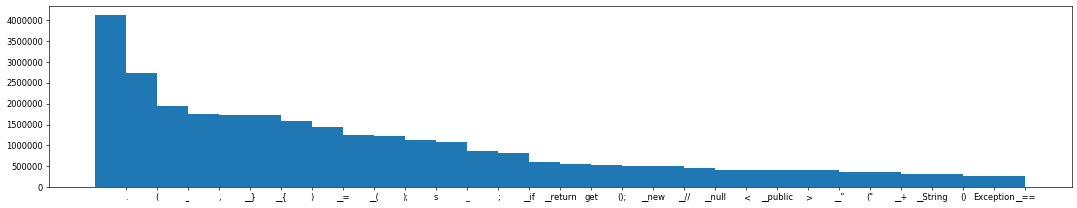

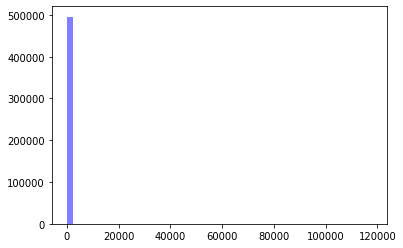

Response:
Percentiles: [ 18.  36.  67. 118.]
Median: 36.0
Mean: 56.64246166607609
StDev: 85.5938832161176
Min: 1
Max: 7523


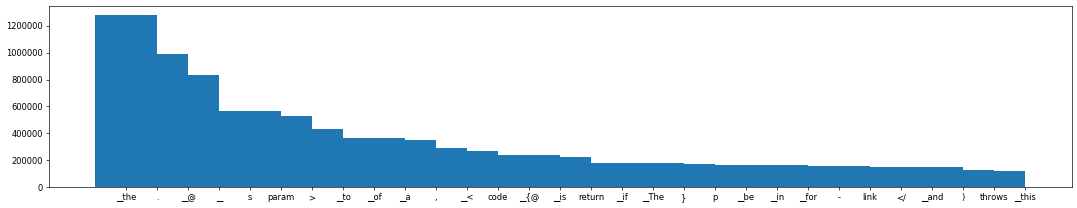

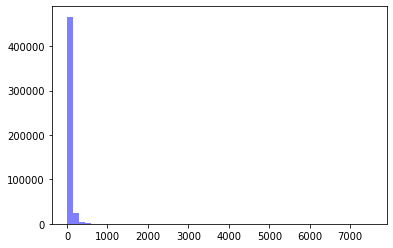

In [20]:
eda(mthds_cmts_df, sp)

In [21]:
so_df = pd.read_csv(data_path/"so_posts/56942_10-3-19_formated.csv")
so_df.head()

,query,res
0,"I am calling a vendor's Java API, and on some ...","If you are using Java 5 or later, you can conn..."
1,"I am calling a vendor's Java API, and on some ...",If it's for professional purpose and you have ...
2,"I am calling a vendor's Java API, and on some ...",Facing the same problem I used YourKit profile...
3,"I am calling a vendor's Java API, and on some ...","Use a profiler. Yes they cost money, and using..."
4,"I am calling a vendor's Java API, and on some ...",If JConsole can't be used you can\n\n\npress C...


In [ ]:
len(so_df)

Query:
Percentiles: [120. 215. 406. 793.]
Median: 215.0
Mean: 380.879333356749
StDev: 575.3002851992665
Min: 17
Max: 19305


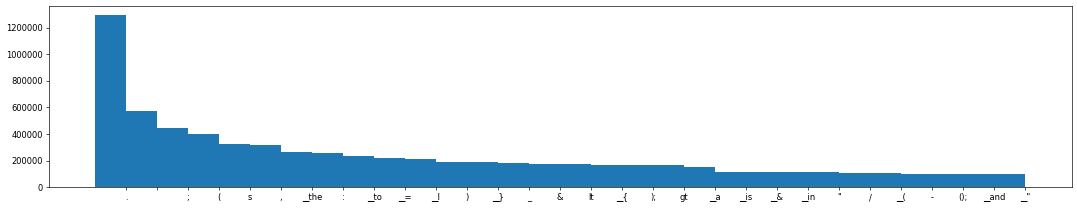

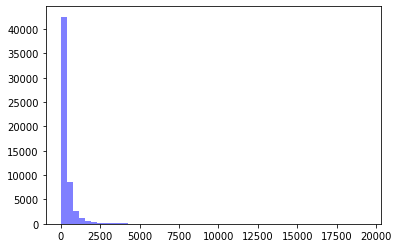

Response:
Percentiles: [ 65. 119. 219. 393.]
Median: 119.0
Mean: 188.50414456815707
StDev: 254.4335996328918
Min: 1
Max: 7599


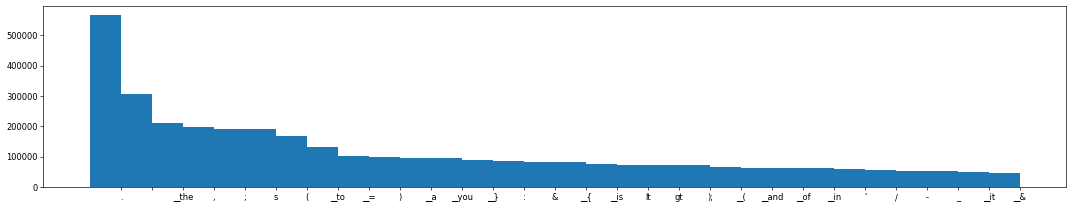

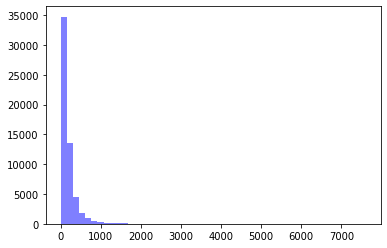

In [22]:
eda(so_df, sp)

In [ ]:
df.to_csv(data_path/"mthds_cmts/mthds_cmts.csv", index=False)

In [ ]:
μ, σ, median = get_stats(list(df["query"]), sp)
μ, σ, median

In [ ]:
toks = get_toks(list(df["query"]), sp)

In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]
flatten_toks = flatten(toks)

In [ ]:
counts = Counter(flatten_toks)

In [ ]:
plot_counts(counts)